# Курсовая работа "Анализ и моделирование рисков деятельности стартапа"

## План:
- Собрать и провести предобработку данных о продажах стартапа (Арт-мастерской Maison)
- Провести исследовательский анализ данных.
- На основе готовых данных построить математические модели: модель линейной регрессии и временных рядов.
- Сделать выводы на основе результатов математического моделирования и провести SMART анализ.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

# 1) Подготовка данных

In [44]:
df = pd.read_csv('sales_maison.csv', encoding='utf-8')
df.head(5)

,Месяц продажи,Наименование,Артикул,Время производства,Цена производства,Цена продажи,Чистая прибыль,Политическое влияние,Экономическое влияние,Социокультурное влияние,Технологическое влияние
0,August,Dragon,1,NaN,250,990,740,0,0,0,1
1,August,Dragon,1,NaN,250,990,740,0,0,0,1
2,August,City,2,NaN,370,1190,820,0,0,0,1
3,August,City,2,NaN,370,1190,820,0,0,0,1
4,August,City,2,NaN,370,1190,820,0,0,0,1


Как мы можем видеть, в таблице названия столбцов не соответствуют общепринятому стандарту, а именно:
- Написаны кириллицей
- Имеют пробелы
- Имеют разный регистр букв

Для того, чтобы это исправить, переименуем столбцы по типу "column_name"

In [45]:
columns_to_rename = {
    'Месяц продажи' : 'sell_date',
    'Наименование' : 'item',
    'Артикул' : 'item_id',
    'Время производства' : 'production_time',
    'Цена производства' : 'production_price',
    'Цена продажи' : 'sell_price',
    'Чистая прибыль' : 'income',
    'Политическое влияние' : 'p_impact',
    'Экономическое влияние' : 'e_impact',
    'Социокультурное влияние' : 's_impact',
    'Технологическое влияние' : 't_impact'
}

df = df.rename(columns=columns_to_rename)

In [46]:
df.head()

,sell_date,item,item_id,production_time,production_price,sell_price,income,p_impact,e_impact,s_impact,t_impact
0,August,Dragon,1,NaN,250,990,740,0,0,0,1
1,August,Dragon,1,NaN,250,990,740,0,0,0,1
2,August,City,2,NaN,370,1190,820,0,0,0,1
3,August,City,2,NaN,370,1190,820,0,0,0,1
4,August,City,2,NaN,370,1190,820,0,0,0,1


Проверим размер датасета

In [47]:
df.shape

(88, 11)

Проверим пропуски в датасете. Во всех столбцах, кроме одного, пропуски отсутствуют. В столбце "production_time" значения отсутствуют полностью, поэтому столбец не будет рассматриваться при работе.

In [48]:
df.isna().sum()

sell_date            0
item                 0
item_id              0
production_time     88
production_price     0
sell_price           0
income               0
p_impact             0
e_impact             0
s_impact             0
t_impact             0
dtype: int64

Описательная статистика: выводим основные значения (средне, стандартное отклонение, минимум, границы каждого квартиля, максимум)

In [49]:
df.describe()

,item_id,production_time,production_price,sell_price,income,p_impact,e_impact,s_impact,t_impact
count,88.000000,0.0,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.159091,NaN,377.50000,1272.159091,894.659091,0.102273,0.261364,0.147727,0.340909
std,1.267511,NaN,156.90432,408.407192,254.449818,0.304743,0.441896,0.356863,0.476731
min,1.000000,NaN,150.00000,450.000000,300.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,250.00000,990.000000,740.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,NaN,370.00000,1190.000000,820.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,NaN,610.00000,1880.000000,1270.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,NaN,610.00000,1880.000000,1270.000000,1.000000,1.000000,1.000000,1.000000


# 2) Анализ данных

### Для начала необходимо проанализировать прибыль, количество продаж и средний чек за каждый месяц для того, чтобы оценить влияние факторов, выявленных в PEST-анализе.

Посчитаем и визуализируем прибыль стартапа по каждому месяцу.

In [50]:
def monthly_income(month):
    month_name = df.loc[df['sell_date'] == month]
    return month_name['income'].sum()

In [51]:
income_aug = monthly_income('August')
income_sep = monthly_income('September')
income_oct = monthly_income('October')
income_nov = monthly_income('November')
income_dec = monthly_income('December')
income_jan = monthly_income('January')
income_feb = monthly_income('February')
income_mar = monthly_income('March')
income_apr = monthly_income('April')

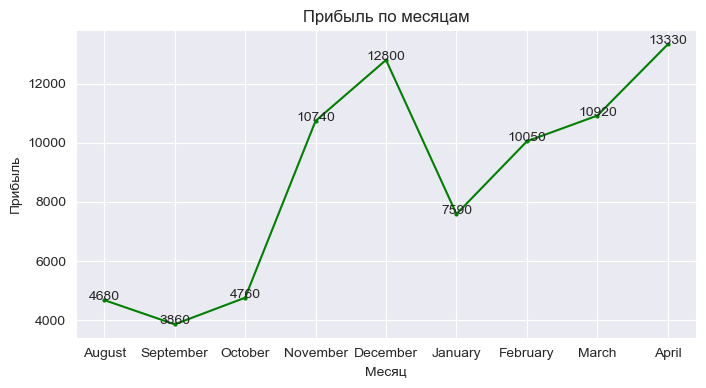

In [52]:
inc_list = np.array([income_aug, income_sep, income_oct, income_nov, income_dec, income_jan, income_feb, income_mar, income_apr])
months = df['sell_date'].unique()

plt.figure(figsize=(8, 4))
plt.plot(months, inc_list, marker='o', markersize=2, color='green')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.title('Прибыль по месяцам')

for i in range(len(inc_list)):
   plt.text(months[i], inc_list[i]+1, str(inc_list[i]), horizontalalignment='center')

plt.show()

## Выводы по графику прибыли:
- В августе стартап только запускался, о чём говорит сумма 4680 (В PEST анализе были выделены технологические факторы).
- В сентябре продажи и выручка, в целом, упали из-за напряжённой ситуации внутри страны (В PEST анализе были выделены экономические и политические факторы влияния).
- К ноябре и декабре выручка вышла на пик в преддверии праздников, так как производимые товары приобретались на подарки.
- В январе продажи упали почти в 2 раза в сравнении с декабрём, что вызвано окончанием праздников и падением спроса на сувенирную продукцию (В PEST анализе были выделены социокультурные факторы).
- В феврале, марте и апреле прибыль усредняется и выходит на "плато".

Посчитаем и визуализируем количество продаж по месяцам, а также посчитаем средний чек по каждому месяцу.

In [53]:
def monthly_sales(month):
    sales = df.loc[df['sell_date'] == month]
    return sales['income'].count()

In [54]:
sales_aug = monthly_sales('August')
sales_sep = monthly_sales('September')
sales_oct = monthly_sales('October')
sales_nov = monthly_sales('November')
sales_dec = monthly_sales('December')
sales_jan = monthly_sales('January')
sales_feb = monthly_sales('February')
sales_mar = monthly_sales('March')
sales_apr = monthly_sales('April')

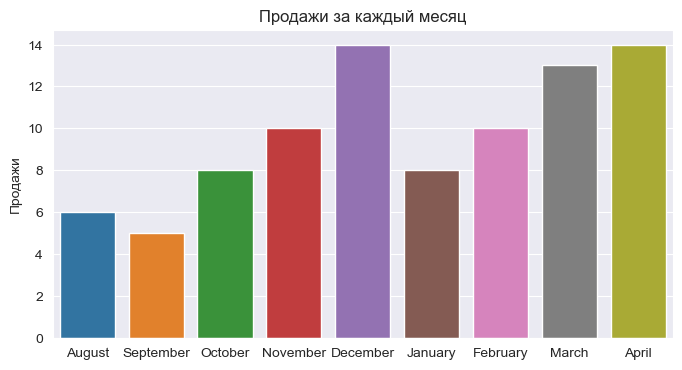

In [55]:
sales_list = np.array([sales_aug, sales_sep, sales_oct, sales_nov, sales_dec, sales_jan, sales_feb, sales_mar, sales_apr])
months = df['sell_date'].unique()

plt.figure(figsize=(8, 4))
sns.barplot(x=np.arange(len(sales_list)), y=sales_list)
plt.xticks(np.arange(len(sales_list)), months)
plt.title('Продажи за каждый месяц')
plt.ylabel('Продажи')
plt.show()

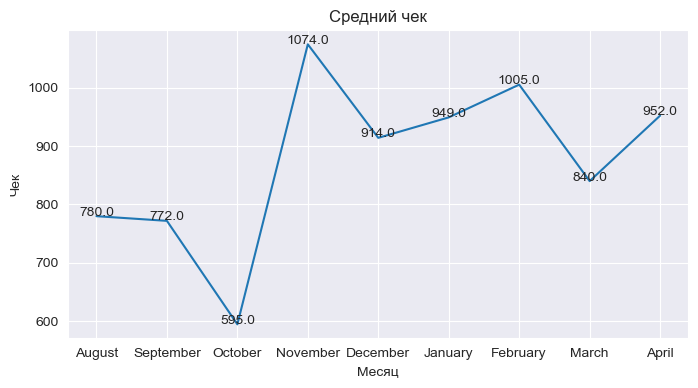

In [56]:
mean_facture = []
for i, j in zip(sales_list, inc_list):
    avg = j / i
    mean_facture.append(avg.round(0))

plt.figure(figsize=(8, 4))
plt.plot(months, mean_facture)
plt.xlabel('Месяц')
plt.ylabel('Чек')
plt.title('Средний чек')

for i in range(len(mean_facture)):
    plt.text(months[i], mean_facture[i]+1, str(mean_facture[i]), horizontalalignment='center')

plt.show()

Выводы по графикам продаж и среднего чека:
- Количество продаж и средний чек коррелируют с прибылью, следовательно, выводы, сделанные по графику прибыли, также справедливы для продаж и среднего чека.

## Рассмотрим частоту продаж и прибыльность каждого из товаров.

Рассмотрим, какие товары наиболее продаваемы и какие приносят наибольшую прибыль. В дальнейшем это будет нужно для прогнозирования продаж отдельных товаров на основании предсказанной прибыли.

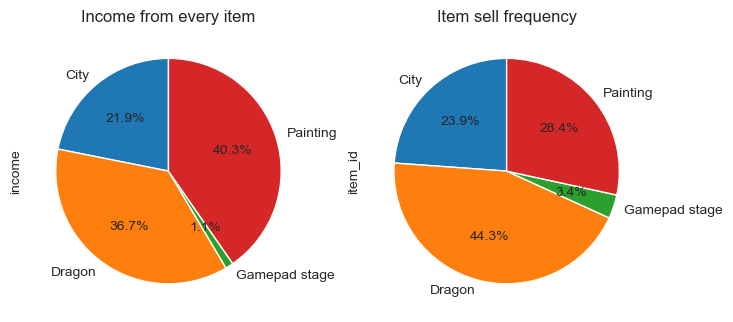

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sells = df.groupby(['item'])['income'].sum()
sells.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Income from every item')

sell_frequency = df.groupby(['item']).count()
sell_frequency['item_id'].plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Item sell frequency')

plt.show()

- В ассортименте Арт-мастерской имеются 4 вида товаров: модели драконов, картины, макеты городов и подставки под геймпады.
- Наиболее продаваемый товар – модели драконов (44,3 % от общего объёма продаж), далее идут картины (28,4 %), макеты городов (23,9%), самый непопулярный товар – подставка под геймпад (1,1%).
- Самым прибыльным товаром являются картины. Несмотря на 28,4% от общего числа продаж, на картины приходится 40,3% прибыли.

### Взаимосвязь между полями

Построим матрицу корреляции Пирсона для количественных признаков и сводные таблицы для категориальных признаков для того, чтобы оценить взаимосвязь между полями датасета.

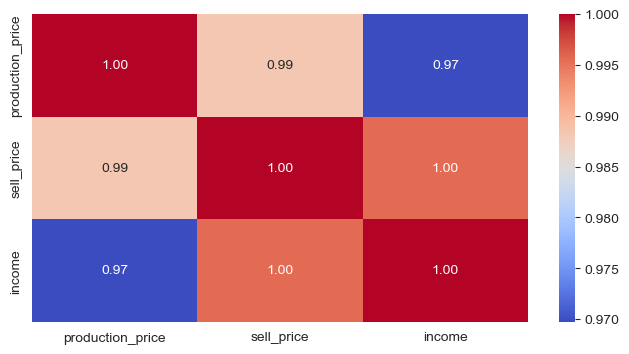

In [58]:
plt.figure(figsize=(8, 4))
corr_matrix = df[['production_price', 'sell_price', 'income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Функция pivot_result()
Функция нужна для создания сводных таблиц, в которых мы посмотрим доли продаваемых товаров в моменты тех или инфх факторов PEST-анализа.

In [59]:
def pivot_result(df, index, value):
    cols = ['Количество продаж', 'Количество с фактором', 'Соотношение']
    pivot = df.pivot_table(index=index, values=value, aggfunc=['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, *cols]
    pivot['Соотношение'] = (pivot['Соотношение'] * 100).round(2)
    fig = px.bar(pivot, x = index, y = 'Соотношение', color = 'Соотношение', title = 'Соотношение по ' + value)
    return pivot, fig.show()

In [60]:
# decorator
def add_graph(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        pivot = result
        cols = ['Количество продаж', 'Количество с фактором', 'Соотношение']
        pivot.columns = [args[1], *cols]
        pivot['Соотношение'] = (pivot['Соотношение'] * 100).round(2)
        fig = px.bar(pivot, x=args[1], y='Соотношение', color='Соотношение', title='Соотношение по ' + args[2])
        fig.show()
        return result
    return wrapper

In [61]:
@add_graph
def pivot_result_dec(df, index, value):
    cols = ['Количество продаж', 'Количество с фактором', 'Соотношение']
    pivot = df.pivot_table(index=index, values=value, aggfunc=['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, *cols]
    pivot['Соотношение'] = (pivot['Соотношение'] * 100).round(2)
    return pivot

In [62]:
pivot_result_dec(df, 'item', 'p_impact')

,item,Количество продаж,Количество с фактором,Соотношение
0,City,21,3,1429.0
1,Dragon,39,3,769.0
2,Gamepad stage,3,3,10000.0
3,Painting,25,0,0.0


In [63]:
pivot_result_dec(df, 'item', 'e_impact')

,item,Количество продаж,Количество с фактором,Соотношение
0,City,21,4,1905.0
1,Dragon,39,8,2051.0
2,Gamepad stage,3,3,10000.0
3,Painting,25,8,3200.0


In [64]:
pivot_result_dec(df, 'item', 's_impact')

,item,Количество продаж,Количество с фактором,Соотношение
0,City,21,6,2857.0
1,Dragon,39,2,513.0
2,Gamepad stage,3,3,10000.0
3,Painting,25,2,800.0


In [65]:
pivot_result_dec(df, 'item', 't_impact')

,item,Количество продаж,Количество с фактором,Соотношение
0,City,21,7,3333.0
1,Dragon,39,9,2308.0
2,Gamepad stage,3,0,0.0
3,Painting,25,14,5600.0


# 3) Построение математических моделей

### В качестве математических моделей мы выбрали линейную регрессию и временные ряды для предсказания прибыли с учётом рисков.

- В качестве оценок качества регрессионной модели мы будем использовать коэффициент детерминации (R2), среднюю квадратичную ошибку(MSE) и среднюю абсолютную ошибку(MAE).

### Построение регрессионной модели

- В качестве предиктора мы возьмём двухмерный массив, содержащий данные о номере товара, цене продажи, факторах PEST-анализа).
- В качестве зависимой переменной выступает доход.
- Размер обучающей выборки модели 0,2.
- В датасете мы обозначили факторы, выявленные в PEST-анализе, как 0 (false) и 1 (true) и присвоили соответствующее значение к каждой продаже.

In [66]:
X = df.drop(['sell_date', 'production_time', 'item', 'income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 8.421247238638224e-14
MSE: 3.6380628792841496e-26
R2: 1.0


### Выводы:
- Средняя абсолютная ошибка (MAE) измеряет среднюю разницу между прогнозируемыми и фактическими значениями. В данном случае, MAE равна 8, что означает среднее абсолютное отклонение от фактической средней прибыли на 8 рублей.
- Средняя квадратичная ошибка (MSE) измеряет среднее значение квадрата разницы между прогнозируемыми и фактическими значениями. В данном случае, MSE равна 4, что соответствует среднеквадратичному отклонению от фактической средней прибыли примерно на 2 рубля.
- Коэффициент детерминации R2 равен 1, что означает, что около 99% вариации зависимой переменной (средняя прибыль) может быть объяснено регрессионной моделью. Это свидетельствует о том, что модель хорошо соответствует данным и способна предсказывать зависимую переменную с высокой точностью.

### Проверим модель на переобучаемость с помощью кросс-валидации

In [67]:
scores = cross_val_score(model, X, y, cv=5)
print(f'Средняя точность: {scores.mean()}')

Средняя точность: 0.9999999994364988


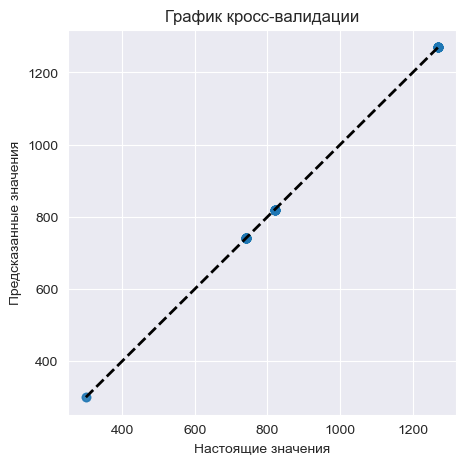

In [68]:
predicted = cross_val_predict(model, X, y, cv=5)
sort_idx = np.argsort(y)

plt.figure(figsize=(5, 5))
plt.scatter(y[sort_idx], predicted[sort_idx], alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.title('График кросс-валидации')
plt.show()

Cредняя точность модели при использовании кросс-валидации составляет 0.99, что говорит о том, что модель имеет хорошую предсказательную способность и не склонна к переобучению. Средняя точность в данном случае указывает на то, что модель верно предсказывает целевую переменную в примерно 99% случаев при использовании различных комбинаций обучающих и валидационных данных.

### Прогнозирование на основе обученной модели

- Создадим массив с данными о всех 4 товарах, цене, а также с политическими и социокультурными аспектами, влияющими на прибыль.
- Сделаем прогноз прибыли за единицу каждого товара.

In [69]:
X.head()

,item_id,production_price,sell_price,p_impact,e_impact,s_impact,t_impact
0,1,250,990,0,0,0,1
1,1,250,990,0,0,0,1
2,2,370,1190,0,0,0,1
3,2,370,1190,0,0,0,1
4,2,370,1190,0,0,0,1


In [70]:
X_new = pd.DataFrame({
    'item_id': [1, 2, 3, 4],
    'production_price': [250, 370, 150, 610],
    'sell_price': [990, 1190, 450, 1880],
    'p_impact': [1, 1, 1, 1],
    'e_impact': [0, 0, 0, 0],
    's_impact': [1, 1, 1, 1],
    't_impact': [0, 0, 0, 0]
})

y_new = model.predict(X_new)
income_item_plan = y_new.round(0)
income_item_plan

array([ 740.,  820.,  300., 1270.])

### Построение временного ряда

В качестве модели для прогнозирования временного ряда мы возьмём модель ARIMA

- ARIMA - статистическая модель для анализа и прогнозирования временных рядов, объединяющая авторегрессию, интегрирование и скользящую среднюю.
- Авторегрессия (AR) - модель, в которой текущее значение временного ряда предсказывается на основе его предыдущих значений с определенным временным лагом.
- Временной лаг - это разница во времени между двумя точками данных во временном ряду. Он указывает на то, сколько периодов времени прошло между двумя наблюдениями.
- Интегрирование (I) - процесс приведения нестационарного временного ряда к стационарному состоянию путем применения операций дифференцирования.
- Нестационарный временной ряд - это ряд, у которого статистические свойства, такие как среднее значение и дисперсия, меняются со временем. Нестационарные ряды могут иметь тренды, сезонность или изменяющуюся во времени дисперсию. Для анализа и прогнозирования временных рядов желательно иметь стационарные ряды, у которых статистические свойства не меняются со временем.
- Дифференцирование - это процесс преобразования временного ряда путем вычитания предыдущего значения ряда из текущего значения. Дифференцирование используется для преобразования нестационарных рядов в стационарные. Применение операции дифференцирования может помочь устранить тренд и другие нестационарные свойства временного ряда.
- Скользящая средняя (MA) - модель, в которой текущее значение временного ряда предсказывается на основе предыдущих ошибок прогнозирования ряда с определенным временным лагом.

Прогноз сделаем на 3 месяца.

In [71]:
model_time = ARIMA(inc_list, order=(1,1,1))
model_fit = model_time.fit()
forecast = model_fit.forecast(steps=3)

forecast.round(0)

array([13020., 12953., 12938.])

Визуализации графика прибыли с учётом предсказанных месяцев.

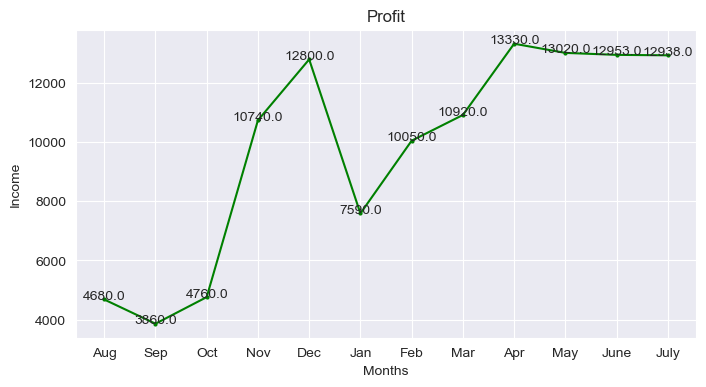

In [72]:
inc_list_1 = np.append(inc_list, forecast.round(0))

months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']
plt.figure(figsize=(8, 4))
plt.plot(months, inc_list_1, marker='o', markersize=2, color='green')
plt.xlabel('Months')
plt.ylabel('Income')
plt.title('Profit')

for i in range(len(inc_list_1)):
    plt.text(months[i], inc_list_1[i]+1, str(inc_list_1[i]), horizontalalignment='center')

plt.show()

# Выводы и построение SMART-анализа

1. Спрос на товары падает после праздников и во время экономико-политических факторов, о чём говорят проанализированные данные. Необходимо улучшать аналитическую базу стартапа, а также внедрять новые инструменты в продвижение товаров.
2. Факторы, выявленные в PEST-анализе, могут сопровождать друг друга.
3. Цели SMART, связанные с сезонностью и падением спроса после праздников, помогут Арт-мастерской эффективно управлять рисками и принять меры для сокращения отрицательного влияния на бизнес, поддерживая стабильность продаж и максимизируя прибыль.
4. Картины, несмотря на занимаемую ими долю продаж в 28,4%, приносят наибольшую прибыль – 40,3% от общей прибыли. Это говорит о высокой рентабельности и значимости данного товара для финансовых показателей компании. Следовательно, при планировании продаж, упор нужно сделать на данную категорию товаров.
5. Прогноз прибыли на каждый товар с учетом политического и социокультурного фактора позволяет оценить потенциальную прибыльность каждого товара в будущем. Наибольший прогноз прибыли у картины (1266.0), за ней следуют модель дракона (733.0), макет города (842.0) и подставка под геймпад (284.0).
6. Прогноз прибыли на следующие 3 месяца (13020.0, 12953.0, 12938.0) позволяет оценить ожидаемую финансовую производительность компании в ближайшем будущем.

### Некоторые примеры постановки целей по SMART:
1. Снизить расходы на производство на 10% в течение года путем оптимизации производственных процессов, внедрения энергосберегающих технологий и сокращения затрат на материалы.
2. Установить партнерство с организациями, занимающимися культурными событиями, для продвижения продукции в течение следующего квартала и увеличения узнаваемости бренда.
3. Разработать и внедрить систему прогнозирования спроса на каждый товар с точностью не менее 90% в течение следующих шести месяцев, используя анализ исторических данных и методы прогнозирования временных рядов.
4. Разработать и реализовать маркетинговую стратегию по удержанию клиентов после праздников, включающую персонализированные предложения, скидки и бонусы, с целью стимулирования повторных покупок и удержания клиентской базы.
5. Разработать и провести маркетинговую кампанию, направленную на привлечение новых клиентов после праздников, с использованием рекламы, социальных сетей и других каналов коммуникации, чтобы компенсировать снижение спроса от постоянных клиентов.